In [2]:
import os
import pandas as pd

path = 'images/'
label = os.listdir(path)

img_names = os.listdir(path)
docs_df = pd.DataFrame({'img_names':img_names})

docs_df['text'] = ''
docs_df.reset_index(drop=True, inplace=True)
docs_df

img_names text
0     10090705_2_page000.jpg     
1     10348077_1_page000.jpg     
2     10348082_1_page000.jpg     
3     10349001_1_page000.jpg     
4     10349187_1_page000.jpg     
...                      ...  ...
1361  11601813_1_page000.jpg     
1362  11602024_1_page000.jpg     
1363  11602026_1_page000.jpg     
1364  11602031_1_page000.jpg     
1365  11603032_1_page000.jpg     

[1366 rows x 2 columns]

In [3]:
import json

# документы хранятся в json-файле в виде: имя файла фотографии: данные: {список слов текста документа}
with open('original_merged_data.json') as data_file:
    data_dict = json.load(data_file)
data_dict

for key in data_dict:
    text = ' '.join(data_dict[key]['data'])
    docs_df.loc[docs_df['img_names'] == key, ['text']] = text
docs_df = docs_df.loc[docs_df['text'] != '']
docs_df

img_names  \
0     10090705_2_page000.jpg   
1     10348077_1_page000.jpg   
2     10348082_1_page000.jpg   
3     10349001_1_page000.jpg   
4     10349187_1_page000.jpg   
...                      ...   
1361  11601813_1_page000.jpg   
1362  11602024_1_page000.jpg   
1363  11602026_1_page000.jpg   
1364  11602031_1_page000.jpg   
1365  11603032_1_page000.jpg   

                                                   text  
0     Универсальный Приложение Ng передаточный к пос...  
1     67591 1SS117157 БИК [045004778 Новосибирск Бан...  
2     67591 1SS117157 БИК [045004778 Новосибирск Бан...  
3     Универсальный Приложение Ng передаточный к пос...  
4     Универсальный Приложение Ng передаточный к пос...  
...                                                 ...  
1361  460048, г. Оренбург, пр. Победы, 164 тел. /фак...  
1362  460048, г. Оренбург, пр. Победы; 164 e-mail: i...  
1363  # €' тел./факс (3532) 99-53-63 e-mail: Info@or...  
1364  460048, г. Оренбург, пр. Победы 164 тел. /факс...  
1365  Общество c ограниченной ответственностью КЛУКО...  

[1365 rows x 2 columns]

In [4]:
with open('ner_labels.json', 'r') as labels_file:
    labels_for_any_docs_dict = json.load(labels_file)
labels_for_any_docs_dict

{'10379793_1_page000.jpg': [['банк-получателя', ['ПАО СБЕРБАНК г Москва']],
  ['бик-банка-получателя', ['044525225']],
  ['дата-счета', ['20 декабря 2021']],
  ['инн-получателя', ['7701314914']],
  ['кпп-получателя', ['771701001']],
  ['номер-счета', ['105920004505']],
  ['наименование-получателя', ['ООО "ТАЛЕС ДИАИЭС']],
  ['TOTAL', ['11 549,40']],
  ['NDS', ['2 309,88']],
  ['TOTALWITHNDS', ['13 859,28']],
  ['TOTAL', ['11 549,40']],
  ['NDS', ['2 309,88']],
  ['TOTALWITHNDS', ['13 859,28']],
  ['сумма-прописью',
   ['Тринадцать тысяч восемьсот пятьдесят девять евро 28 центов']],
  ['инн-исполнителя-поставщика', ['7701314914']],
  ['PRICE', ['577,47']],
  ['инн-плательщика', ['7707083893']],
  ['адрес-исполнителя', ['129085, Москва г, Годовикова ул, дом 9,']],
  ['адрес-исполнителя', ['строение 31']],
  ['содержание-хоз-операции',
   ['Заготовки банковских карт',
    'Маз@г агф  ог-ф Сгеф ₽Р"',
    '(оригинал-макет &@ 01182133)']],
  ['кор-счет-банка-получателя', ['301018104000000002

In [6]:
entity_types = []
for i in labels_for_any_docs_dict:
    for j in range(len(labels_for_any_docs_dict[i])):
        entity_types.append(labels_for_any_docs_dict[i][j][0])
entity_types = set(entity_types)
print(f' Число сущностей: {len(entity_types)}\n', entity_types)

 Число сущностей: 67
 {'банк-плательщика', 'номер-акта', 'УИП', 'дата-акта', 'VAT', 'SHIPPERACC', 'наименование-получателя', 'NDS', 'PRICE', 'DEBT', 'AMOUNT', 'DUE', 'ADDRESSSHIPPER', 'кпп-плательщика', 'INNBUYER', 'NAMEBUYER', 'DOCDATE', 'SFNUM', 'BPNAME', 'KPPBUYER', 'адрес-исполнителя', 'кпп-исполнителя-поставщика', 'банк-получателя', 'SUMM', 'ADDROBJ', 'содержание-хоз-операции', 'расчетный-счет-плательщика', 'бик-банка-плательщика', 'SHIPPERBANK', 'номер-сф', 'дата-счета', 'кпп-получателя', 'BPINN', 'DOGDATE', 'SHIPPERNAME', 'Compensation_coeff', 'ADDRESSSELLER', 'VAT_rate', 'инн-исполнителя-поставщика', 'BPKPP', 'MEASUREUNIT', 'расчетный-счет-получателя', 'CURRENCY', 'SHIPPERCORACC', 'бик-банка-получателя', 'период-оказания-услуг', 'TOTAL', 'DOGNUM', 'ADDRESSBUYER', 'CONTENT', 'адрес-объекта-платежа', 'инн-получателя', 'наименование-исполнителя-поставщика', 'номер-договора', 'UNITPRICE', 'сумма-прописью', 'дата-сф', 'TOTALWITHNDS', 'номер-счета', 'лицевой-счет-исполнителя', 'кор-с

##### Одна сущность может называться по-разному, напимер: "KPP" и "кпп", приведу сущности к единым обозначениям

In [7]:
# для удобства просмотра и редактирования перенесу список сущностей в файл

with open('Сущности.txt', 'w', encoding='utf-8') as f:
    for i in entity_types:
        f.write(i + '\n')

In [8]:
# после сопоставления в файле взаимозаменяемых сущностей вношу изменения в словарь

translater_dict = {}

with open('Сущности_ред.txt', 'r', encoding='utf-8') as f:
    for i in f.readlines():
        word2translate = i.split()
        translater_dict[word2translate[0]]  = word2translate[1]

for i in labels_for_any_docs_dict:
    for j in range(len(labels_for_any_docs_dict[i])):
        if labels_for_any_docs_dict[i][j][0] in translater_dict:
            labels_for_any_docs_dict[i][j][0] = translater_dict[labels_for_any_docs_dict[i][j][0]]
labels_for_any_docs_dict

{'10379793_1_page000.jpg': [['банк-получателя', ['ПАО СБЕРБАНК г Москва']],
  ['бик-банка-получателя', ['044525225']],
  ['DOCDATE', ['20 декабря 2021']],
  ['INNBUYER', ['7701314914']],
  ['KPPBUYER', ['771701001']],
  ['SFNUM', ['105920004505']],
  ['наименование-получателя', ['ООО "ТАЛЕС ДИАИЭС']],
  ['TOTAL', ['11 549,40']],
  ['NDS', ['2 309,88']],
  ['TOTALWITHNDS', ['13 859,28']],
  ['TOTAL', ['11 549,40']],
  ['NDS', ['2 309,88']],
  ['TOTALWITHNDS', ['13 859,28']],
  ['сумма-прописью',
   ['Тринадцать тысяч восемьсот пятьдесят девять евро 28 центов']],
  ['BPINN', ['7701314914']],
  ['PRICE', ['577,47']],
  ['INNBUYER', ['7707083893']],
  ['ADDRESSSELLER', ['129085, Москва г, Годовикова ул, дом 9,']],
  ['ADDRESSSELLER', ['строение 31']],
  ['CONTENT',
   ['Заготовки банковских карт',
    'Маз@г агф  ог-ф Сгеф ₽Р"',
    '(оригинал-макет &@ 01182133)']],
  ['кор-счет-банка-получателя', ['30101810400000000225']],
  ['расчетный-счет-получателя', ['40702810938000012523']],
  ['KPP

### Предобработка данных

##### В данных пристутсвуют выбросы. Поскольку данные были получены на основе разметки человека, предположим, что выбросы можно корректно обработать скриптом, не прибегая к повторной разметке

In [283]:
from string import punctuation
import re


def get_entry_left(string, sentence):
    for i in range(len(sentence)):
        if string != '' and string != ' ':
            if string in sentence:
                return string
            else:
                string = string[:-1]
        else: return None


def get_entry_right(string, sentence):
    for i in range(len(sentence)):
        if string != '' and string != ' ':
            if string in sentence:
                return string
            else:
                string = string[1:]
        else: return None


def get_max_word(_string, string_):
    if _string != None and string_ != None:
        r = len(_string)
        l = len(string_)
        if max(r, l) == r: return _string
        else: return string_
    elif _string != None and string_ == None:
        return _string
    elif _string == None and string_ != None:
        return string_
    else: return None


def complex_estimation(s, string):
    _s = get_entry_right(s, string)
    s_ = get_entry_left(s, string)
    return get_max_word(_s, s_)


def isfloat(string):
    try:
        float(string)
        return True
    except: 
        return False

# фильтр нерелевантных значений для каждой сущности
# оценка некоторых пороговых значений для длины сущности основана на личном опыте работы с разметкой ...
# ... имеющихся в данной работе данных
pattern = '[%s]+' % re.escape(punctuation)
def bad_word(entity_type, entity):
    var = False
    if entity_type == 'ADDRESSBUYER':
        if len(entity) <= 21: var = True
    if entity_type == 'ADDRESSSHIPPER':
        if len(entity) <= 4: var = True
    if entity_type == 'ADDRESSSELLER':
        if len(entity) <= 16: var = True
    if entity_type == 'AMOUNT':
        if isfloat(entity) == False: var = True
        elif re.match(r'[0]\d+', entity) != None: var = True
    if entity_type == 'BPINN':
        if re.sub(pattern, '', ''.join(entity.split())).isalpha(): var = True
        elif len(entity) != 10: var = True
    if entity_type == 'BPKPP':
        if re.sub(pattern, '', ''.join(entity.split())).isalpha(): var = True
        elif len(entity) != 10: var = True
    if entity_type == 'BPNAME':
        if len(entity) < 9: var = True
        elif len(entity) < 10 and entity in ['ОБЩЕСТВО С', 'Общество ', 'ОБЩЕСТВО ', 'Стоимость']: var = True
    if entity_type == 'CONTENT':
        if len(entity) < 3 or entity in ['ливо', ' 116']: var = True
    if entity_type == 'CURRENCY':
        if len(entity) < 8: var = True
    if entity_type == 'CURRENCYKOD':
        if entity.isalpha(): var = True
    if entity_type == 'DOCDATE':
        if len(entity) < 10: var = True
        if ''.join(entity.split()).isalpha(): var = True
    if entity_type == 'DOGDATE':
        if ''.join(entity.split()).isalpha(): var = True
        elif len(entity) < 4: var = True
    if entity_type == 'DOGNUM':
        if ''.join(entity.split()).isalpha(): var = True
    if entity_type == 'INNBUYER':
        if re.sub(pattern, '', ''.join(entity.split())).isalpha(): var = True
        elif len(entity) != 10: var = True
    if entity_type == 'KPPBUYER':
        if re.sub(pattern, '', ''.join(entity.split())).isalpha(): var = True
        elif len(entity) != 10: var = True
    if entity_type == 'MEASUREUNIT':
        if len(re.sub(pattern, '', ''.join(entity.split()))) == 1: var = True
    if entity_type == 'NAMEBUYER':
        if len(entity) < 11: var = True
    if entity_type == 'PRICE':
        if re.sub(pattern, '', ''.join(entity.split())).isalpha(): var = True
    if entity_type == 'SFNUM':
        if re.sub(pattern, '', ''.join(entity.split())).isalpha(): var = True
        elif ''.join(entity.split()) in punctuation: var = True
    if entity_type == 'SHIPPERNAME':
        if len(entity) < 5: var = True
        elif len(entity) < 11 and entity in ['Акционерно', 'Общество ', 'ОБЩЕСТВО ', 'Стоимость']: var = True
    if entity_type == 'UNITPRICE':
        if isfloat(entity) == False: var = True
        elif re.match(r'[.]\d+', entity) != None: var = True
        elif re.match(r'[0]\d+', entity) != None: var = True

    # эксперимент
    if entity_type == 'расчетный-счет-плательщика':
        if len(entity) != 20: var = True
    if entity_type == 'расчетный-счет-покупателя':
        if len(entity) != 20: var = True
    if entity_type == 'расчетный-счет-получателя':
        if len(entity) != 20: var = True
    if entity_type == 'кор-счет-банка-получателя':
        if len(entity) != 20: var = True
    if entity_type == 'кор-счет-банка-плательщика':
        if len(entity) != 20: var = True
    if entity_type == 'лицевой-счет-исполнителя':
        if len(entity) != 20: var = True
    if entity_type == 'бик-банка-плательщика':
        if len(entity) != 9: var = True
    if entity_type == 'бик-банка-получателя':
        if len(entity) != 9: var = True
    if entity_type == 'содержание-хоз-операции':
        if len(entity) < 7 and entity != 'ГСМ': var = True
    if entity_type == 'сумма-прописью':
        if len(entity) < 13: var = True
    if entity_type == 'ADDROBJ':
        if len(entity) < 12: var = True
    if entity_type == 'наименование-плательщика':
        if len(entity) < 10: var = True
    if entity_type == 'TOTALWITHNDS':
        if re.sub(pattern, '', ''.join(entity.split())).isalpha(): var = True
    if entity_type == 'дата-акта':
        if len(entity) < 10: var = True
        if re.sub(pattern, '', ''.join(entity.split())).isalpha(): var = True
    if entity_type == 'наименование-получателя':
        if len(entity) < 10: var = True
    if entity_type == 'SHIPPERBANK':
        if len(entity) < 12: var = True
    if entity_type == 'банк-плательщика':
        if entity == ' БАНК ПАО': var = True
    if entity_type == 'банк-получателя':
        if len(entity) < 7: var = True
    if entity_type == 'номер-акта':
        if re.sub(pattern, '', ''.join(entity.split())).isalpha(): var = True
    return var

In [284]:
ner_labels_dict = {}
for i in docs_df['img_names']:
    text = docs_df['text'].loc[docs_df['img_names'] == i].values[0]
    if i in labels_for_any_docs_dict:
        entities_list = []
        for j in labels_for_any_docs_dict[i]:
            entity_type, entity = j
            word_list = []
            entity_text = ''.join(entity)
            for word in entity:
                word = complex_estimation(word, text)
                if word != None and word not in punctuation:
                    word_list.append(word)
            if len(word_list) != 0 and ''.join(word_list) in text:
                entity_text = ''.join(word_list)
                if bad_word(entity_type, entity_text) == False:
                    entity_text_length = len(entity_text)
                    start_index = text.find(entity_text)
                    entities_list.append({'entity_type': entity_type, 'entity_text': entity_text, 'start': start_index, 'end': start_index + entity_text_length})
            elif entity_text in text:
                entity_text = complex_estimation(entity_text, text)
                if entity_text != None and entity_text not in punctuation and bad_word(entity_type, entity_text) == False:
                    entity_text_length = len(entity_text)
                    start_index = text.find(entity_text)
                    entities_list.append({'entity_type': entity_type, 'entity_text': entity_text, 'start': start_index, 'end': start_index + entity_text_length})
        ner_labels_dict[i] = {'text': text, 'entities': entities_list}

In [285]:
ner_labels_dict

{'10090705_2_page000.jpg': {'text': "Универсальный Приложение Ng передаточный к постановлению Правительства Российской Федерации документ Счет-фактура N H-mkt-291021-0315 от 29.10.2021 (1) от 26 декабря 2011 года Ng 1137 Статус 3 Исправление N от 1a) в ред Постановления Правительства РФ от 02.04.2021 Ng 534) 1 счет-фактура Продавец: Общество '2) и передаточный Адрес: 107061, Москва Преображенская пл, 8, этаж 27, ПОМ LXXXVI (2a) документ (акт) 2 передаточный 7811365157 997350001 (26) документ (акт) Грузоотправитель и его адрес: '3) 3 счет-фактура Грузополучатель и его адрес: К платёжно-расчётному документу Ng 5) Документ об отгрузке Ng п/п '5а) Покупатель: Дальневосточный банк ПАО Сбербанк (6) Адрес: 117997, Г Москва, Вавилова 19 (ба) ИННКПП покупателя: 7707083893 272143001 (66) Валюта: наименование, код Российский рубль; 643 Идентификатор государственного контракта; договора (соглашения)(при наличии): Информационное поле по документу: Дог 050003898145 AGR_Договор вн. Ng 777 Количествен

##### оценим значения различных сущностей на предмет явных выбросов для расширения функционала bad_word(...)

In [286]:
lens_list = []
for i in ner_labels_dict:
    for j in ner_labels_dict[i]['entities']:
        if j['entity_type'] == 'номер-акта':
            lens_list.append(len(j['entity_text']))
            if len(j['entity_text']) < 100:
                print(j['entity_text'])

9130
9135
9129
9129
9129
9339
9335
9337
68
2
1
64
66
2024-10
07
08
1067
188
14
10
1065
00
1069
6
2017
3
58
31
26
10044317
50
52
09
4
202
36
20
45
214
74
213
213
214
ЦБ-64
ЦБ-64
93
ЦБ-81
ЦБ-65
ЦБ-85
ЦБ-88
ЦБ-75
11
НК-00000112
НК-00000115
ЦБ-92
ЦБ-9
21
НК-00000127
НК-00000127
100822
1
ЦБ-115
ЦБ-131
ЦБ-123
ЦБ-127
437
437
15
0213
202
2/200
132
А22/11-09
2/202


##### визуализация распределений длин некоторых сущностей

<Axes: ylabel='Count'>

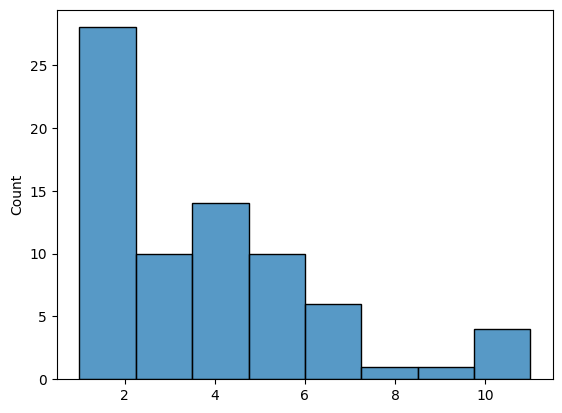

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.xticks(range(0, 50, 2))
sns.histplot(lens_list)

### Процесс токенизации

In [288]:
from razdel import tokenize

def extract_labels(item):
    raw_toks = list(tokenize(item['text']))
    words = [tok.text for tok in raw_toks]
    word_labels = ['O'] * len(raw_toks)
    char2word = [None] * len(item['text'])
    for i, word in enumerate(raw_toks):
        char2word[word.start:word.stop] = [i] * len(word.text)

    for e in item['entities']:
        e_words = sorted({idx for idx in char2word[e['start']:e['end']] if idx is not None})
        word_labels[e_words[0]] = 'B-' + e['entity_type']
        for idx in e_words[1:]:
            word_labels[idx] = 'I-' + e['entity_type']

    return {'tokens': words, 'tags': word_labels}

##### проверка

In [289]:
import random

random.choice(list(ner_labels_dict.keys()))

'10681018_1_page000.jpg'

In [290]:
e = ner_labels_dict['10393498_1_page000.jpg']
for i in range(len(extract_labels(e)['tokens'])):
    if extract_labels(e)['tags'][i] != 'O':
        print(extract_labels(e)['tokens'][i], extract_labels(e)['tags'][i])

ГРС-21-00135 B-SFNUM
ОБЩЕСТВО B-BPNAME
С I-BPNAME
ОГРАНИЧЕННОЙ I-BPNAME
ОТВЕТСТВЕННОСТЬЮ I-BPNAME
" I-BPNAME
ГАММА-РЕГИОН I-BPNAME
" I-BPNAME
7736675686 B-BPINN
Байкальский B-NAMEBUYER
банк I-NAMEBUYER
ПАО I-NAMEBUYER
Сбербанк I-NAMEBUYER
7707083893 B-INNBUYER
Российский B-CURRENCY
рубль I-CURRENCY
643 B-CURRENCYKOD
3547821 B-DOGNUM


разбиение данных на тренировочную и тестовую выборки

In [291]:
from sklearn.model_selection import train_test_split
ner_data = [extract_labels(item) for _, item in ner_labels_dict.items()]
ner_train, ner_test = train_test_split(ner_data, test_size=0.2, random_state=1)

In [292]:
pd.options.display.max_colwidth = 300
pd.DataFrame(ner_train).sample(3)

tokens  \
415  [Приложение, Ng, K, постановлению, Правительства, Российской, Федерации, от, 26, декабря, 2011, г, ., Na, 1137, Счет-фактура, Ng, 470, от, 20, января, 2022, г, :, (, 1, ), (, в, редакции, постановления, Правительства, Российской, Федерации, от, 2, апреля, 2021, €, Na, 534, ), Исправление, Ng, от...   
758  [ID, ОЦ, :, 14062, ID, 1, C, :, 14062, Общество, с, ограниченной, ответственностью, Центральная, Процессинговая, Компания, ', 125047, РФ, Москва, ;, ул, :, Лесная, ,, д, :, 20, ,, стр, :, 1, пом, 1, ,, эт, :, 1, ,, ком, ., 4, Внимание, !, Уважаемые, клиенты, !, Обращаем, Ваше, внимание, на, обяз...   
215  [Счет-фактура, Ng, 1558, 24, ноября, 2021, г, :, (, 1, ), Исправление, Ng, (, 1, a, ), Продавец, :, Общество, c, ограниченной, ответственностью, ", Алиот, ", (, 2, ), Покупатель, :, ПАО, Сбербанк, (, 6, ), 715093, ,, Москва, г, Партийный, пер, ;, дом, Ng, 1, 3, (, 2, a, ), Адрес, :, 117997, ,, г...   

                                                                                                                                                                                                                                                                                                            tags  
415  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-SFNUM, O, B-DOCDATE, I-DOCDATE, I-DOCDATE, I-DOCDATE, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-BPNAME, I-BPNAME, I-BPNAME, O, O, O, O, O, B-NAMEBUYER, I-NAMEBUYER, I-NAMEBUYER, I-NAMEBUYER, I-NAMEB...  
758  [O, O, O, O, O, O, O, O, O, B-SHIPPERNAME, I-SHIPPERNAME, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-банк-получателя, I-банк-получателя, O, O, O, O, O, O, O, O, B-...  
215  [O, O, B-SFNUM, B-DOCDATE, I-DOCDATE, B-VAT, I-DOCDATE, I-DOCDATE, O, O, O, O, O, O, O, O, O, O, O, O, O, B-BPNAME, I-BPNAME, I-BPNAME, I-BPNAME, I-BPNAME, O, O, O, O, O, B-NAMEBUYER, I-NAMEBUYER, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-B...

In [293]:
label_list = sorted({label for item in ner_data for label in item['tags']})
if 'O' in label_list:
    label_list.remove('O')
    label_list = ['O'] + label_list
label_list

['O',
 'B-ADDRESSBUYER',
 'B-ADDRESSSELLER',
 'B-ADDRESSSHIPPER',
 'B-ADDROBJ',
 'B-AMOUNT',
 'B-BPINN',
 'B-BPKPP',
 'B-BPNAME',
 'B-CONTENT',
 'B-CURRENCY',
 'B-CURRENCYKOD',
 'B-Compensation_coeff',
 'B-DEBT',
 'B-DOCDATE',
 'B-DOGDATE',
 'B-DOGNUM',
 'B-DUE',
 'B-INNBUYER',
 'B-KPPBUYER',
 'B-MEASUREUNIT',
 'B-NAMEBUYER',
 'B-NDS',
 'B-PRICE',
 'B-SFNUM',
 'B-SHIPPERACC',
 'B-SHIPPERBANK',
 'B-SHIPPERCORACC',
 'B-SHIPPERNAME',
 'B-SUMM',
 'B-TOTAL',
 'B-TOTALWITHNDS',
 'B-UNITPRICE',
 'B-VAT',
 'B-УИП',
 'B-банк-плательщика',
 'B-банк-получателя',
 'B-бик-банка-плательщика',
 'B-бик-банка-получателя',
 'B-дата-акта',
 'B-кор-счет-банка-плательщика',
 'B-кор-счет-банка-получателя',
 'B-наименование-получателя',
 'B-номер-акта',
 'B-период-оказания-услуг',
 'B-расчетный-счет-плательщика',
 'B-расчетный-счет-получателя',
 'B-сумма-прописью',
 'I-ADDRESSBUYER',
 'I-ADDRESSSELLER',
 'I-ADDRESSSHIPPER',
 'I-ADDROBJ',
 'I-BPNAME',
 'I-CONTENT',
 'I-CURRENCY',
 'I-DEBT',
 'I-DOCDATE',
 'I-

#### Составим датасет

In [294]:
from datasets import Dataset, DatasetDict

C:\Users\21223242\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [295]:
ner_data = DatasetDict({
    'train': Dataset.from_pandas(pd.DataFrame(ner_train)),
    'test': Dataset.from_pandas(pd.DataFrame(ner_test))
})
ner_data

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 1091
    })
    test: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 273
    })
})

In [296]:
from transformers import AutoTokenizer

checkpoint = "rubert-tiny2"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [297]:
def tokenize_and_align_labels(examples, label_all_tokens=False):
    tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

    labels = []
    for i, label in enumerate(examples['tags']):
        word_ids = tokenized_inputs.word_ids(batch_index=i)
        previous_word_idx = None
        label_ids = []
        for word_idx in word_ids:
            if word_idx is None:
                label_ids.append(-100)
            elif word_idx != previous_word_idx:
                label_ids.append(label[word_idx])
            else:
                label_ids.append(label[word_idx] if label_all_tokens else -100)
            previous_word_idx = word_idx

        label_ids = [label_list.index(idx) if isinstance(idx, str) else idx for idx in label_ids]

        labels.append(label_ids)

    tokenized_inputs["labels"] = labels
    return tokenized_inputs

In [298]:
tokenize_and_align_labels(ner_data['train'][22:23])

{'input_ids': [[2, 9109, 12, 21, 13, 80278, 2215, 10, 30, 12, 21, 312, 13, 61659, 4225, 30, 83596, 2182, 40603, 10767, 3301, 11278, 12, 22, 13, 81049, 30, 39511, 6, 45304, 1928, 6, 12, 26, 13, 66363, 30, 33532, 29, 12, 22, 312, 13, 66363, 30, 12, 2692, 13, 16168, 6850, 22594, 20361, 1383, 19, 16168, 19419, 22820, 12, 719, 13, 15344, 15219, 20493, 1447, 1433, 1113, 19, 22906, 15991, 15450, 1031, 12, 1957, 13, 32643, 18092, 1186, 51488, 320, 1142, 30638, 30, 3280, 1712, 12, 23, 13, 38263, 2763, 603, 30, 29045, 3576, 33444, 41848, 16, 18308, 32643, 18092, 48264, 15333, 4550, 320, 1142, 30638, 30, 12, 24, 13, 40341, 10299, 33088, 2442, 9147, 36035, 16, 733, 12, 25, 13, 25269, 12, 32547, 13, 12, 1129, 32450, 13, 30, 12, 28, 13, 45184, 2514, 76579, 1550, 12, 25, 312, 13, 31784, 7244, 33404, 33404, 30737, 46448, 40724, 1232, 15714, 14151, 63, 61486, 67115, 34413, 12, 25137, 51430, 35962, 16133, 17, 37451, 12, 39902, 13, 30737, 12, 9333, 16, 282, 2079, 40278, 34239, 16, 12, 9333, 16, 29849, 13

In [299]:
# токенизация датасета

tokenized_datasets = ner_data.map(tokenize_and_align_labels, batched=True)
tokenized_datasets

Map: 100%|██████████| 273/273 [00:00<00:00, 456.06 examples/s]


DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 1091
    })
    test: Dataset({
        features: ['tokens', 'tags', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 273
    })
})

### Fine-tuning

In [300]:
from transformers import AutoModelForTokenClassification, TrainingArguments, Trainer

model = AutoModelForTokenClassification.from_pretrained(checkpoint, num_labels=len(label_list))
model.config.id2label = dict(enumerate(label_list))
model.config.label2id = {v: k for k, v in model.config.id2label.items()}

Some weights of BertForTokenClassification were not initialized from the model checkpoint at rubert-tiny2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [301]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer)

In [302]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer

def compute_metrics(p):
    predictions, labels, inputs = p.predictions, p.label_ids, p.inputs
    predictions = np.argmax(p.predictions, axis=2)

    # send only the first token of each word to the evaluation
    true_predictions = []
    true_labels = []
    for prediction, label, tokens in zip(predictions, labels, inputs):
        true_predictions.append([])
        true_labels.append([])
        for (p, l, t) in zip(prediction, label, tokens):
            if l != -100 and not tokenizer.convert_ids_to_tokens(int(t)).startswith('##'):
                true_predictions[-1].append(label_list[p])
                true_labels[-1].append(label_list[l])

    labels = [j for i in true_labels for j in i]
    preds = [j for i in true_predictions for j in i]
    return {'Accuracy': accuracy_score(labels, preds),
            'F1': f1_score(labels, preds, average="weighted")}

In [305]:
batch_size = 5

args = TrainingArguments(
    "ner",
    evaluation_strategy = "epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    weight_decay=0.01,
    save_strategy='no',
    report_to='none',
    include_inputs_for_metrics=True,
)

trainer = Trainer(
    model,
    args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [306]:
trainer.evaluate()

100%|██████████| 55/55 [01:29<00:00,  1.62s/it]


{'eval_loss': 4.397054195404053,
 'eval_Accuracy': 0.0071545094383593565,
 'eval_F1': 0.012479564464870177,
 'eval_runtime': 91.1364,
 'eval_samples_per_second': 2.996,
 'eval_steps_per_second': 0.603}

In [307]:
trainer.train()

C:\Users\21223242\AppData\Roaming\Python\Python310\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
                                                          
 10%|█         | 219/2190 [4:09:07<1:19:39,  2.42s/it]

{'eval_loss': 0.7036119103431702, 'eval_Accuracy': 0.9074807737124213, 'eval_F1': 0.8634649072293631, 'eval_runtime': 77.9875, 'eval_samples_per_second': 3.501, 'eval_steps_per_second': 0.705, 'epoch': 1.0}


                                                       
 20%|██        | 438/2190 [4:22:29<1:14:00,  2.53s/it]

{'eval_loss': 0.5554819107055664, 'eval_Accuracy': 0.9074807737124213, 'eval_F1': 0.8634649072293631, 'eval_runtime': 78.3006, 'eval_samples_per_second': 3.487, 'eval_steps_per_second': 0.702, 'epoch': 2.0}


 23%|██▎       | 500/2190 [4:25:36<1:16:48,  2.73s/it] 

{'loss': 1.0672, 'learning_rate': 7.71689497716895e-06, 'epoch': 2.28}


                                                      
 30%|███       | 657/2190 [4:34:47<1:00:21,  2.36s/it]

{'eval_loss': 0.4674720764160156, 'eval_Accuracy': 0.9177697506408763, 'eval_F1': 0.8844347480462488, 'eval_runtime': 75.9258, 'eval_samples_per_second': 3.596, 'eval_steps_per_second': 0.724, 'epoch': 3.0}


                                                       
 40%|████      | 876/2190 [4:48:41<54:42,  2.50s/it]

{'eval_loss': 0.42016327381134033, 'eval_Accuracy': 0.9235725938009788, 'eval_F1': 0.8943992973389447, 'eval_runtime': 76.8565, 'eval_samples_per_second': 3.552, 'eval_steps_per_second': 0.716, 'epoch': 4.0}


 46%|████▌     | 1000/2190 [4:55:11<57:47,  2.91s/it] 

{'loss': 0.4712, 'learning_rate': 5.4337899543379e-06, 'epoch': 4.57}


                                                       
 50%|█████     | 1095/2190 [5:01:17<42:01,  2.30s/it]

{'eval_loss': 0.3878270983695984, 'eval_Accuracy': 0.9281752505243533, 'eval_F1': 0.9023543824078277, 'eval_runtime': 76.3618, 'eval_samples_per_second': 3.575, 'eval_steps_per_second': 0.72, 'epoch': 5.0}


                                                       
 60%|██████    | 1314/2190 [5:13:51<35:16,  2.42s/it]

{'eval_loss': 0.36593231558799744, 'eval_Accuracy': 0.9323584246096481, 'eval_F1': 0.9088916801105364, 'eval_runtime': 78.9855, 'eval_samples_per_second': 3.456, 'eval_steps_per_second': 0.696, 'epoch': 6.0}


 68%|██████▊   | 1500/2190 [5:23:42<36:57,  3.21s/it]  

{'loss': 0.4023, 'learning_rate': 3.1506849315068495e-06, 'epoch': 6.85}


                                                     
 70%|███████   | 1533/2190 [5:26:37<26:07,  2.39s/it]

{'eval_loss': 0.351963609457016, 'eval_Accuracy': 0.9346073176415753, 'eval_F1': 0.9122680564769904, 'eval_runtime': 78.3832, 'eval_samples_per_second': 3.483, 'eval_steps_per_second': 0.702, 'epoch': 7.0}


                                                       
 80%|████████  | 1752/2190 [5:39:20<17:42,  2.43s/it]

{'eval_loss': 0.34259817004203796, 'eval_Accuracy': 0.9358191563738056, 'eval_F1': 0.9137262157929866, 'eval_runtime': 78.3522, 'eval_samples_per_second': 3.484, 'eval_steps_per_second': 0.702, 'epoch': 8.0}


                                                       
 90%|█████████ | 1971/2190 [5:51:48<08:25,  2.31s/it]

{'eval_loss': 0.3371591567993164, 'eval_Accuracy': 0.9362619436028897, 'eval_F1': 0.9144378021536204, 'eval_runtime': 75.7146, 'eval_samples_per_second': 3.606, 'eval_steps_per_second': 0.726, 'epoch': 9.0}


 91%|█████████▏| 2000/2190 [5:53:33<13:16,  4.19s/it]  

{'loss': 0.37, 'learning_rate': 8.675799086757991e-07, 'epoch': 9.13}


                                                     
100%|██████████| 2190/2190 [6:04:24<00:00,  9.98s/it]

{'eval_loss': 0.33522123098373413, 'eval_Accuracy': 0.9366231647634584, 'eval_F1': 0.9148205355299324, 'eval_runtime': 76.0158, 'eval_samples_per_second': 3.591, 'eval_steps_per_second': 0.724, 'epoch': 10.0}
{'train_runtime': 21864.7875, 'train_samples_per_second': 0.499, 'train_steps_per_second': 0.1, 'train_loss': 0.5587138938032873, 'epoch': 10.0}


TrainOutput(global_step=2190, training_loss=0.5587138938032873, metrics={'train_runtime': 21864.7875, 'train_samples_per_second': 0.499, 'train_steps_per_second': 0.1, 'train_loss': 0.5587138938032873, 'epoch': 10.0})

##### проверка

In [309]:
from transformers import pipeline

pipe = pipeline(model=model, tokenizer=tokenizer, task='ner', aggregation_strategy='average')

In [319]:
# вспомогательная функция для удобного отображения предсказания
def get_pred(idx=None):
    if idx == None:
        idx = random.choice(range(len(ner_test)))
    text = ' '.join(ner_test[idx]['tokens'])
    print(text)
    for i in pipe(text):
        print(i)

In [327]:
get_pred()

Счет-фактура Ng 3573 23 июня 2022 г : ( 1 ) ( в редакции постановления Правительства Российской Федерации от 2 апреля 2021 r . N 534 ) Исправление Ng ( 1 a ) Продавец : Акционерное Общество НоваКард ( 2 ) Покупатель : ПАО " Сбербанк России " ( 6 ) Адрес : 603024 , Нижегородская обл ; Нижний Новгород г Невзоровых ул ; дом Ng 49 , помещение 9 ( 2 a ) Адрес : ( ба ) ИННЖКПП продавца : ( 26 ) 7707083893/526002001 ( 66 ) Грузоотправитель и e го адрес : Валюта : наименование ; кОД Российский рубль ; 643 Филиал ПАО " Сбербанк России " Волго-Вятский банк 603950 , Нижегородская обл ; Нижний Грузополучатель и e го адрес : ( 4 ) Идентификатор государственного контракта ; От ( 5 ) договора ( соглашения ) ( при наличии ) : ( 8 Документ об отгрузке Ng п / п 1 Ng 3574 от 23.06.2022 г : ( 5 а ) Единица Стоимость Стоимость товаров Страна Репистрационный номер [ Наименование товара ( описание выполненных измерения Коли- Цена ( тариф ) товаров ( работ , Сумма налога ; происхождения товара Ng работ , оказ

In [324]:
for i in range(2):
    get_pred()
    print('\n\n')

Универсальный Приложение Ng передаточный к постановлению Правительства Российской Федерации документ Счет-фактура N 2618 от 03.12.2021 ( 1 ) от 26 декабря 2011 года Ng 1137 Статус 3 Исправление N от 1 a ) в ред Постановления Правительства РФ от 02.04.2021 Ng 534 ) 1 счет-фактура Продавец : ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ " КАНЦ ПРЕМИУМ " ' 2 ) и передаточный Адрес : 620130 , Свердловская область ; ЕКАТЕРИНБУРГГ СТЕПАНА РАЗИНА УЛ ; ДОМ 109 , ОФИС 113 ( 2 a ) документ ( акт ) 2 передаточный ИННМКПП продавца : 6671384839 667901001 ( 26 ) документ ( акт ) Грузоотправитель и его адрес : Он же ' 3 ) 3 счет-фактура Грузополучатель и его адрес : К платёжно-расчётному документу Ng 5 ) Документ об отгрузке Ng п / п ' 5 а ) Покупатель : Дальневосточный банк ПАО Сбербанк ( 6 ) Адрес : 117997 , Г Москва , Вавилова 19 ( ба ) ИННКПП покупателя : 7707083893 272143001 ( 66 ) Валюта : наименование , код Российский рубль ; 643 Идентификатор государственного контракта ; договора ( соглашения ) ( 